In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the data set
iris = pd.read_csv('Iris.csv',index_col=0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# check for missing values and duplicated rows
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [56]:
iris.duplicated()

Id
1      False
2      False
3      False
4      False
5      False
       ...  
146    False
147    False
148    False
149    False
150    False
Length: 150, dtype: bool

No missing values and duplicated rows in this data set.

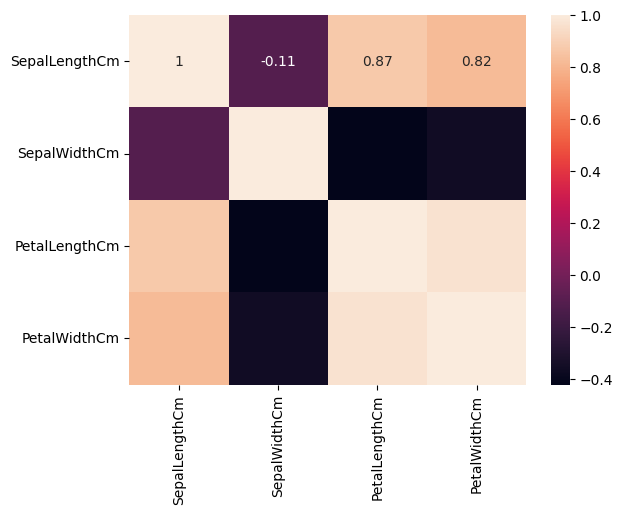

In [5]:
iris.drop('Species', axis = 1, inplace=True)

sns.heatmap(iris.corr(),annot=True)
plt.show()

There is high correlation between Sepal length and petal length and between Sepal length and petal width.

In [49]:
iris.shape

(150, 5)

          ENCODING THE SPECIES COLUMN TO HAVE VALUES ONLY 0 AND 1

In [6]:
# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map the species to 0 and 1
df['species'] = df['species'].map({0: 0, 1: 1, 2: 1})

# Verify the encoding
print(df['species'].value_counts())
df.tail()

species
1    100
0     50
Name: count, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


                                       MEASURING MODEL PERFORMANCE

In [7]:
# out data set is now df
X = df.iloc[:,[0,1,2,3]].values
y = df.iloc[:,4].values

X = X.reshape(-1, 4)
X_scaled = preprocessing.scale(X) # scale the data 
X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.25, random_state=0)


                                      FITTING THE MODEL TO LOGISTIC MODEL

In [8]:
# fit a model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
# make predictions on test data
y_pred = log_reg.predict(X_test).reshape(-1,1)

In [10]:
# use score method to get accuracy of model
score = log_reg.score(X_test, y_test)
print('Accuracy: {}'.format(score))


Accuracy: 1.0


                          PERFORMANCE USING CONFUSION MATRIX

Accuracy Score: 1.0
Confusion Matrix: 
 [[13  0]
 [ 0 25]]
Classification Report: 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        25

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



<Figure size 5000x1500 with 0 Axes>

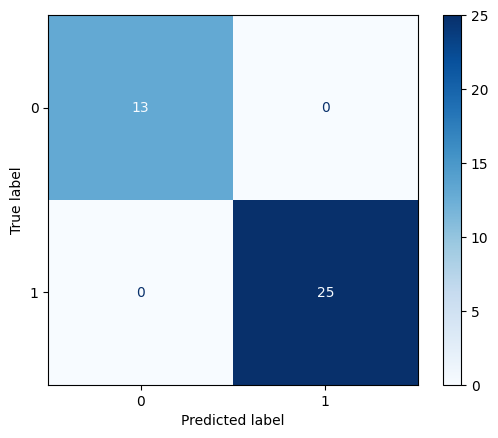

In [11]:
#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report     , ConfusionMatrixDisplay

print("Accuracy Score:",accuracy_score(y_pred, y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred, y_test))
print("Classification Report: \n " ,classification_report(y_pred, y_test))
cm = confusion_matrix(y_pred, y_test,labels=log_reg.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
plt.figure(figsize=(50, 15))
disp.plot(cmap='Blues')

In our case 0 represents Iris- satosa and 1 represents not Iris-satosa(Iris-viginica,Iris-Versicolor).From the confusion matrix both recall and precision is 1 and the model perfectly predicted on the unseen data set.The F1 score is 1 too, we have a good balace between precision and recall.In this particular case though our model identifys correctly between Iris-satosa and not Iris-satosa.

In [ ]:
# Please see separate file for optional task.